In [1]:
from glotaran_tools.specification_parser import parse_yml
from glotaran_core.model import Dataset
from glotaran_models.kinetic import KineticSeperableModel
import numpy as np
from lmfit import Parameters
# Imports for plotting

import matplotlib.pyplot as plt
%matplotlib notebook

test_parameter = [101e-4, 202e-5, 505e-6, 0.1, 10]
test_amps = [1,2,3]
times = np.asarray(np.arange(0, 1500, 1.5))

fitspec = '''
type: kinetic

parameter: {}

compartments: [s1, s2, s3]

megacomplexes:
    - label: mc1
      k_matrices: [k1]
    - label: mc2
      k_matrices: [k2]

k_matrices:
  - label: "k1"
    matrix: {{
      '("s1","s1")': 1,
      '("s2","s2")': 2,
}}
  - label: "k2"
    matrix: {{
      '("s3","s3")': 3,
}}

irf:
  - label: irf1
    type: gaussian
    center: 4
    width: 5
    
datasets: 
  - label: dataset1
    type: spectral
    megacomplexes: [mc1, mc2]
    path: 'data/dataset1.ascii'
    irf: irf1

'''
model = parse_yml(fitspec.format(test_parameter))
print(model)

Modeltype: Kinetic

Parameter
---------

Index: 1 Initial Value: 0.0101 Label: None
Index: 2 Initial Value: 0.00202 Label: None
Index: 3 Initial Value: 0.000505 Label: None
Index: 4 Initial Value: 0.1 Label: None
Index: 5 Initial Value: 10.0 Label: None

Megacomplexes
-------------

Label: mc1
K-Matrices: ['k1']
Label: mc2
K-Matrices: ['k2']

Datasets
--------

Dataset 'dataset1'

	Dataset Scaling: None
	Initial Concentration: None
	Megacomplexes: ['mc1', 'mc2']

	Irf: irf1


K-Matrices
----------

Label: k1
Matrix:
[[1 0]
 [0 2]]
Label: k2
Matrix:
[[3]]


IRFs
----

Label: irf1 Type: 'Gaussian' Center: [4] Width: [5] Center Dispersion: [] Width Dispersion [] Scale: [], Nomalize: True



In [2]:
simparams = Parameters()
simparams.add("p1", 101e-3)
simparams.add("p2",202e-4)
simparams.add("p3",505e-5)
simparams.add("p4",0.3)
simparams.add("p5",21.4)
simparams.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr
p1     0.101     -inf      inf     None     True     None
p2    0.0202     -inf      inf     None     True     None
p3   0.00505     -inf      inf     None     True     None
p4       0.3     -inf      inf     None     True     None
p5      21.4     -inf      inf     None     True     None


In [4]:
fitmodel = KineticSeperableModel(model)
fitmodel.get_initial_fitting_parameter().pretty_print()
fitmodel._get_irf_parameter(fitmodel.get_initial_fitting_parameter().valuesdict(), "irf1")

Name     Value      Min      Max   Stderr     Vary     Expr
p1    0.0101     -inf      inf     None     True     None
p2   0.00202     -inf      inf     None     True     None
p3  0.000505     -inf      inf     None     True     None
p4       0.1     -inf      inf     None     True     None
p5        10     -inf      inf     None     True     None


(array([ 0.1]), array([ 10.]), array([ 1.]))

<IPython.core.display.Javascript object>


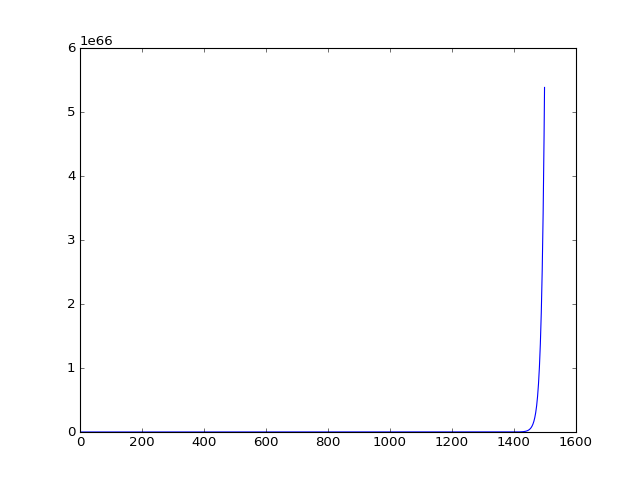

In [5]:
data = fitmodel.eval(simparams, *times, **{'dataset':'dataset1'})
data = fitmodel.eval(simparams, *times, **{'dataset':'dataset1'})

fig = plt.figure()
plt.plot(times, data[:, 0])

In [ ]:
result = fitmodel.fit(fitmodel.get_initial_fitting_parameter(), 
                      *times, 
                      **{"data": data}
                     )
result.params.pretty_print()